Library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageSequence, ImageEnhance, ImageFilter,ImageOps
import numpy as np
import matplotlib.pyplot as plt

Remove Background

In [ ]:
from rembg import remove
from PIL import Image

input_path = "../Pic/Test/goat.jpg"
output_path = "../Remove Pic/Test/goat.png"

input_image = Image.open(input_path)
output_image = remove(input_image)
output_image.save(output_path)



Big ben

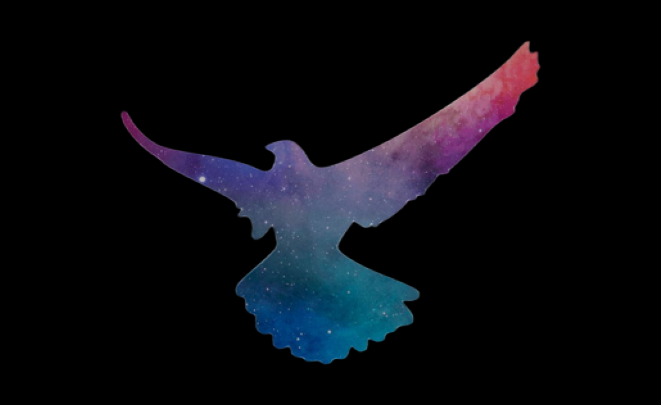

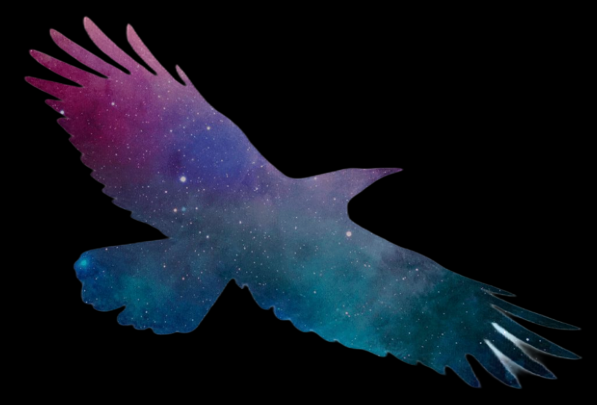

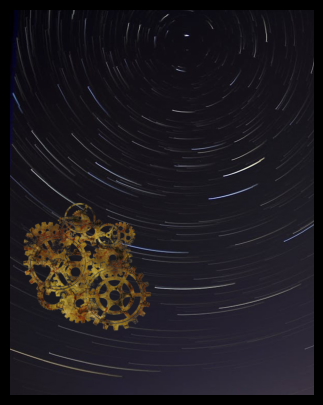

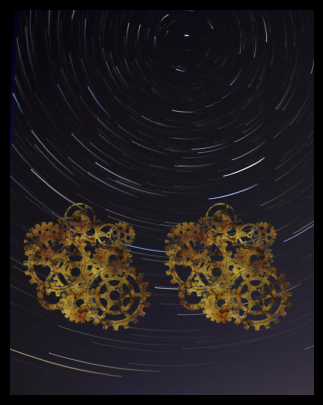

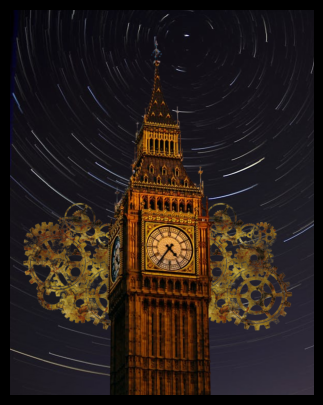

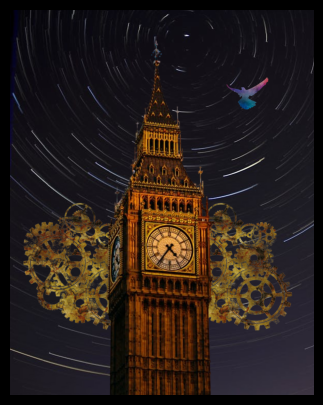

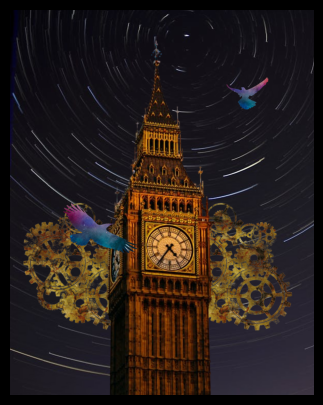

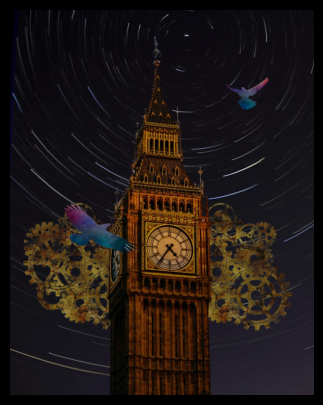

Composite image saved to ../Processed Pic/Big ben/result5.png


In [6]:

def add_overlay(background, overlay, position_x, position_y):
    # 获取覆盖图像的大小
    overlay_width, overlay_height = overlay.size
    background_width, background_height = background.size

    # 检查覆盖图像是否超出背景图像的范围
    if position_x + overlay_width > background_width or position_y + overlay_height > background_height:
        raise ValueError("覆盖图像超出了背景图像的范围")

    # 创建掩码
    if overlay.mode == 'RGBA':
        r, g, b, a = overlay.split()
        overlay_rgb = Image.merge("RGB", (r, g, b))
        mask = a
    else:
        overlay_rgb = overlay
        mask = ImageOps.invert(ImageOps.grayscale(overlay_rgb))

    # 粘贴覆盖图像到背景图像上
    background.paste(overlay_rgb, (position_x, position_y), mask)

def increase_brightness(image, value=1.3):
    enhancer = ImageEnhance.Brightness(image)
    brightened_img = enhancer.enhance(value)
    return brightened_img

def blend_and_brighten_overlay(overlay, galaxy, brightness_value=1.5, blend_alpha=0.5):
    overlay_rgb = overlay.convert("RGB")
    alpha_channel = overlay.split()[3]

    # Blend the overlay image with the galaxy mask
    overlay_rgb = Image.blend(overlay_rgb, galaxy, alpha=blend_alpha)

    # Brighten the overlay_rgb image
    overlay_rgb = increase_brightness(overlay_rgb, value=brightness_value)

    # If there was an alpha channel, merge it back
    overlay = Image.composite(overlay_rgb, Image.new("RGBA", overlay.size), alpha_channel)

    return overlay

def darken_image(image, alpha=0.8):
    enhancer = ImageEnhance.Brightness(image)
    darker_image = enhancer.enhance(alpha)
    return darker_image

# 路径
background_image_path = "../High Resolution Pic/Big ben/star.jpeg"
gear_image_path = "../Pic/Big ben/gear.png"
bigBen_image_path = "../Processed Pic/Big ben/Big ben-Photoroom.png" 
crow1_image_path = "../Remove Pic/Big ben/crow2.png"  # Replace with your overlay image path
crow2_image_path = "../Remove Pic/Big ben/crow3.png" 
galaxy_image_path = "../Pic/Big ben/galaxy.jpg"

# 读取底层图像和覆盖图像
background = Image.open(background_image_path).convert("RGB")
gear = Image.open(gear_image_path).convert("RGBA")
bigBen = Image.open(bigBen_image_path).convert("RGBA")
crow1 = Image.open(crow1_image_path).convert("RGBA")
crow2 = Image.open(crow2_image_path).convert("RGBA")
galaxy = Image.open(galaxy_image_path).convert("RGB")

# 调整覆盖图像的大小
gear = gear.resize((1000, 1000))
bigBen = bigBen.resize((2368, 3000))
crow1 = crow1.resize((500, 300))  # Adjust size as needed
crow2 = crow2.resize((600,400))
galaxy1 = galaxy.resize(crow1.size)
galaxy2 = galaxy.resize(crow2.size) 

# 处理鸦图像
crow1 = blend_and_brighten_overlay(crow1, galaxy1, brightness_value=1.5, blend_alpha=0.5)
plt.figure(figsize=(10, 5))
plt.imshow(np.array(crow1))
plt.axis('off')
plt.show()

crow2 = blend_and_brighten_overlay(crow2, galaxy2, brightness_value=1.5, blend_alpha=0.5)
plt.figure(figsize=(10, 5))
plt.imshow(np.array(crow2))
plt.axis('off')
plt.show()

# 第一次叠加
add_overlay(background, gear, 100, 1500)
plt.figure(figsize=(10, 5))
plt.imshow(np.array(background))
plt.axis('off')
plt.show()

# 第二次叠加
add_overlay(background, gear, 1200, 1500)
plt.figure(figsize=(10, 5))
plt.imshow(np.array(background))
plt.axis('off')
plt.show()

# 粘贴大本钟图像到背景图像上
add_overlay(background, bigBen, 0, 0)
plt.figure(figsize=(10, 5))
plt.imshow(np.array(background))
plt.axis('off')
plt.show()

# 粘贴鸦图像到背景图像上
background.paste(crow1, (1600, 500), crow1)
plt.figure(figsize=(10, 5))
plt.imshow(np.array(background))
plt.axis('off')
plt.show()

background.paste(crow2, (400, 1500), crow2)
plt.figure(figsize=(10, 5))
plt.imshow(np.array(background))
plt.axis('off')
plt.show()

# 变暗图像
darker_background = darken_image(background, alpha=0.8)

# 保存合成后的图像
output_path = "../Processed Pic/Big ben/result5.png"
darker_background.save(output_path)

# 显示图像
plt.figure(figsize=(10, 5))
plt.imshow(np.array(darker_background))
plt.axis('off')
plt.show()

print(f"Composite image saved to {output_path}")


St. Paul’s Cathedral

In [3]:

# Brighten the image
def brighten_image(image, factor=1.5):
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(factor)
    return brightened_image

# Open images and convert to RGBA mode
background = Image.open("../High Resolution Pic/Test/St.jpg").convert("RGBA")
foreground = Image.open("../Remove Pic/Test/Angel3.png").convert("RGBA")
light = Image.open("../Pic/Test/yellow light.jpg").convert("RGBA")

# Resize the light effect image to match the background size
light = light.resize(background.size, Image.LANCZOS)

# Set the transparency of the light effect image
alpha = 170  # Transparency value, 0 fully transparent, 255 fully opaque
light.putalpha(alpha)

# Resize the foreground image, e.g., shrink to 30% of the original size
new_size = (int(foreground.width * 0.3), int(foreground.height * 0.3))
foreground = foreground.resize(new_size, Image.LANCZOS)

# Brighten the background image
brightened_background = brighten_image(background)
light = brighten_image(light)
foreground = brighten_image(foreground)

# Movement range and step size
move_range = 700  # Vertical movement range
step = 10         # Step size for each movement

# Initial position
start_position = (1200, 0)
background_width, background_height = brightened_background.size

frames = []

# Dynamically move the foreground image
for i in range(0, move_range, step):
    # Calculate the new vertical position
    new_position = (start_position[0], start_position[1] + i)
    
    # Create a new light effect image with the same size as the background
    full_size_light = Image.new("RGBA", brightened_background.size)
    
    # Determine the lower bound of the cropping area to ensure it doesn't exceed the light effect image height
    lower_bound = min(i-5 + background_height, light.height)
    
    # Crop the light effect image
    crop_light = light.crop((0, i, background_width, lower_bound))
    
    # Paste the cropped light effect image onto the new light effect image
    full_size_light.paste(crop_light, (0, 0), crop_light)
    
    # Create a new copy of the background image
    background_copy = brightened_background.copy()
    
    # Paste the foreground image at the new position
    background_copy.paste(foreground, new_position, foreground)
    
    # Composite the light effect image and the background image
    combined = Image.alpha_composite(background_copy, full_size_light)
    
    # Add to frames
    frames.append(combined)

# Save as GIF
frames[0].save('../video/St. Paul’s Cathedral.gif', save_all=True, append_images=frames[1:], loop=0, duration=100)


Lake District

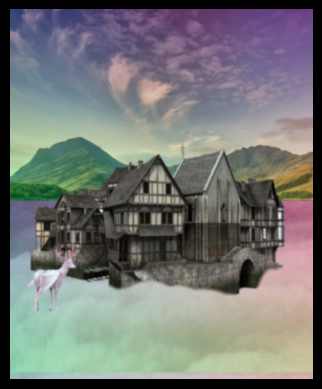

In [1]:

def add_vintage_filter(img):
    img = ImageOps.grayscale(img)
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(0.5)
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.1)
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    noise = np.random.normal(0, 25, (img.height, img.width)).astype(np.uint8)
    noise_img = Image.fromarray(noise, 'L')
    img = Image.blend(img, noise_img, 0.5)
    return img

def add_fantasy_filter(img):
    img_cv = np.array(img)
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
    img_fantasy = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    img_fantasy = Image.fromarray(img_fantasy)
    return img_fantasy

def add_rainbow_filter(img):
    gradient = np.zeros((img.height, img.width, 3), dtype=np.uint8)
    for i in range(img.height):
        for j in range(img.width):
            gradient[i, j] = [int(255 * j / img.width), int(255 * i / img.height), 128]
    gradient_img = Image.fromarray(gradient)
    img = Image.blend(img, gradient_img, 0.3)
    return img

def generate_cloud_mask(size):
    cloud_mask = Image.new('L', size, 0)
    draw = ImageDraw.Draw(cloud_mask)
    for _ in range(100):
        x1 = np.random.randint(0, size[0] // 2)
        y1 = np.random.randint(0, size[1] // 2)
        x2 = np.random.randint(size[0] // 2, size[0])
        y2 = np.random.randint(size[1] // 2, size[1])
        draw.ellipse([x1, y1, x2, y2], fill=255)
    cloud_mask = cloud_mask.filter(ImageFilter.GaussianBlur(radius=10))
    return cloud_mask

def brighten_image(image, factor=1.5):
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(factor)
    return brightened_image

# Load the original image
original_img = Image.open("../High Resolution Pic/Test/Test1.jpg")
cloud = Image.open("../Pic/Test/cloud.jpg")
village = Image.open("../Remove Pic/Test/village.png")
goat = Image.open("../Remove Pic/Test/goat.png")

# Get image dimensions
original_width, original_height = original_img.size
cloud = cloud.resize(original_img.size, Image.LANCZOS)

# Resize images
goat_width, goat_height = goat.size
goat = goat.resize((goat_width, goat_height))
village = village.resize((2000, 1500))
village = brighten_image(village)

# Adjust crop position, move down 50 pixels
move_down_pixels = 50
lower_half = original_img.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))
lower_half_cloud = cloud.crop((0, original_height // 2 + move_down_pixels, original_width, original_height))

# Apply fantasy filter and other effects to the lower half
lower_half_fantasy = add_fantasy_filter(lower_half_cloud)
lower_half_fantasy = add_rainbow_filter(lower_half_fantasy)
lower_half_fantasy_half = lower_half_fantasy.crop((0, original_height // 4 - move_down_pixels, original_width, original_height))
lower_half_fantasy_left = lower_half_fantasy.crop((0, original_height // 4 - move_down_pixels - 100, original_width // 4, original_height))
lower_half_fantasy_right = lower_half_fantasy.crop((original_width // 2 + original_width // 4, original_height // 4 - move_down_pixels - 100, original_width, original_height))

cloud_mask = generate_cloud_mask(lower_half_fantasy_half.size)
cloud_mask_left = generate_cloud_mask(lower_half_fantasy_left.size)
cloud_mask_right = generate_cloud_mask(lower_half_fantasy_right.size)

# Combine the original image's upper half and the processed lower half
upper_half = original_img.crop((0, 0, original_width, original_height // 2 + move_down_pixels))
upper_half = add_rainbow_filter(upper_half)
combined_img = Image.new('RGB', (original_width, original_height))
combined_img.paste(upper_half, (0, 0))
combined_img.paste(lower_half_fantasy, (0, original_height // 2 + move_down_pixels))
combined_img.paste(village, (100, 850), village)
combined_img.paste(lower_half_fantasy_half, (0, original_height // 2 + original_height // 4 - move_down_pixels), cloud_mask)
combined_img.paste(lower_half_fantasy_left, (0, original_height // 2 + original_height // 4 - move_down_pixels - 100), cloud_mask_left)
combined_img.paste(lower_half_fantasy_right, (original_width // 2 + original_width // 4, original_height // 2 + original_height // 4 - move_down_pixels - 100), cloud_mask_right)
combined_img.paste(lower_half_fantasy_half, (0, original_height - move_down_pixels))
combined_img.paste(goat, (100, 1750), goat)
combined_img = combined_img.filter(ImageFilter.GaussianBlur(radius=4))

# Display the result
plt.imshow(combined_img)
plt.axis('off')
plt.show()
